In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt


I have used Kaggle for simple machine learning algorithm competitions before hwoever, most of them did not come close to the required row counts, and instead consisted of wider data with many columns of different variables (eg house prices vs. all the features listed in a house listing). 

I then thought about differnt image recognition models, and how those are based on matrices with pixels, figuring they would require a lot of different unqique handwritten examples to generate conclusive predicitons. That lead me to this dataset of train and test, where the total between the two is greater than 50,000 rows and instead of having different columns, each column represents a pixel in the image matrix. The dataset is the widely known MNIST dataset. I also was looking for a dataset that was simple, since in the event we use this for the final and collaborate as a team on colab, the more row and feature packed datasets seem to crash our environment as we go more in depth.

Kaggle Competition Link:
https://www.kaggle.com/c/digit-recognizer


## Import Data

In [3]:
train_df = pd.read_csv('digittrain-2.csv')
test_df = pd.read_csv('digittest.csv')



In [9]:
train_df.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [5]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [8]:
train_df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


## Visualizations

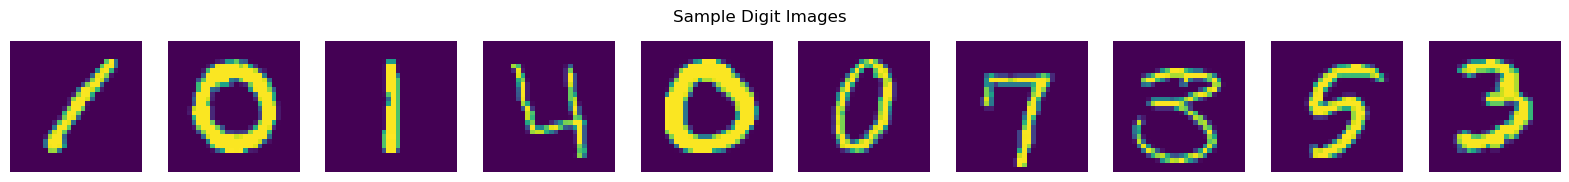

In [21]:
#Displays first 10 images
fig, axes = plt.subplots(1, 10, figsize=(20, 2))
for i, ax in enumerate(axes):
    img = train_df.drop(columns='label').iloc[i].values.reshape(28, 28)
    ax.imshow(img)
    ax.axis('off')
plt.suptitle("First 10 Sample Digit Images")
plt.show()

The first value appears to be a 1, however with a diagonal which could affect predictability?

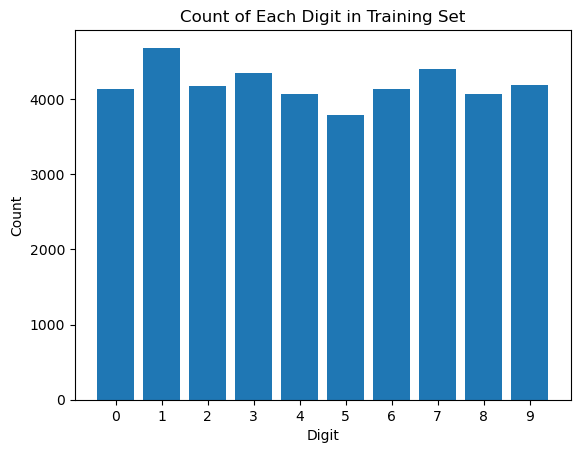

In [12]:
#Set labels
label_counts = train_df['label'].value_counts().sort_index()
#Count plot for rough distribution
plt.figure()
plt.bar(label_counts.index, label_counts.values)
plt.title("Count of Each Digit in Training Set")
plt.xlabel("Digit")
plt.ylabel("Count")
plt.xticks(label_counts.index)
plt.show()

Relatively even distribution of digit counts.

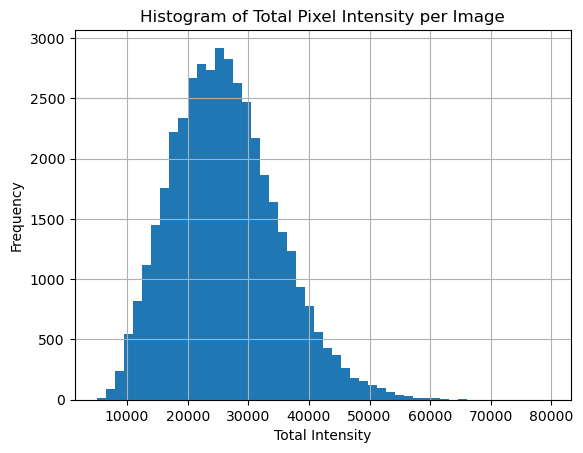

In [14]:
#Distribution of images pixel intensity
plt.figure()
train_df.drop(columns='label').sum(axis=1).hist(bins=50)
plt.title("Histogram of Total Pixel Intensity per Image")
plt.xlabel("Total Intensity")
plt.ylabel("Frequency")
plt.show()

There may be a link to what number an image is and the image's total pixel intensity

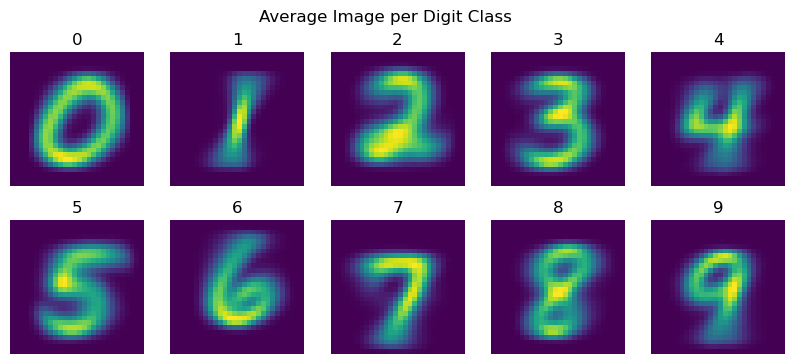

In [15]:
avg_images = train_df.groupby('label').mean().drop(columns='label', errors='ignore')
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for digit, ax in zip(range(10), axes.flatten()):
    img = avg_images.loc[digit].values.reshape(28, 28)
    ax.imshow(img)
    ax.set_title(str(digit))
    ax.axis('off')
plt.suptitle("Average Image per Digit Class")
plt.show()

## Investigate missing data and outliers

In [10]:
#Check for null although shouldnt be any...
columns_with_null = train_df.columns[train_df.isnull().any()]
null_values = train_df[columns_with_null].isnull().sum()

print("Columns with null values:")
print(null_values)

Columns with null values:
Series([], dtype: float64)


As expected no null values

## More EDA

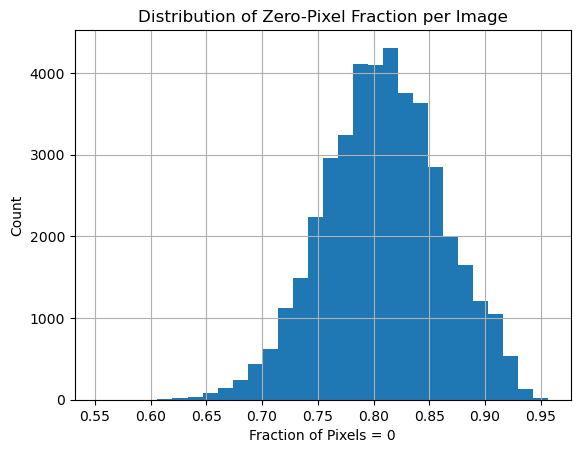

In [22]:
#Ratio of pixels to blank essentially
zero_frac = (train_df.drop(columns='label') == 0).sum(axis=1) / (28*28)
zero_frac.hist(bins=30)
plt.title("Distribution of Zero-Pixel Fraction per Image")
plt.xlabel("Fraction of Pixels = 0")
plt.ylabel("Count")
plt.show()


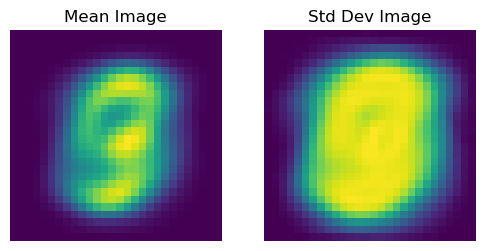

In [24]:
#What the average image and standard dev looks like
mu = train_df.drop(columns='label').mean().values.reshape(28,28)
sigma = train_df.drop(columns='label').std().values.reshape(28,28)

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(6,3))
ax1.imshow(mu); ax1.set_title("Mean Image")
ax2.imshow(sigma); ax2.set_title("Std Dev Image")
for ax in (ax1,ax2): ax.axis('off')
plt.show()


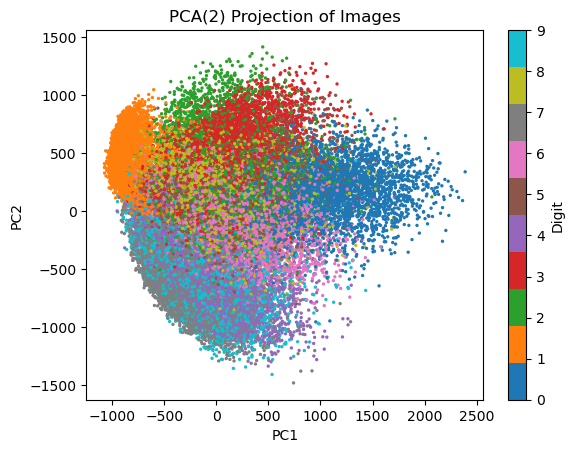

In [25]:
#Look at quick PCA placement
from sklearn.decomposition import PCA

X = train_df.drop(columns='label').values
pca = PCA(2)
coords = pca.fit_transform(X)

plt.scatter(coords[:,0], coords[:,1], c=train_df['label'], s=2, cmap='tab10')
plt.colorbar(ticks=range(10), label='Digit')
plt.title("PCA(2) Projection of Images")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()